In [513]:
import re
import pandas as pd
import numpy as np
# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandasql import sqldf
warnings.filterwarnings('ignore')
%matplotlib inline

In [514]:
df_exercise = pd.read_csv('Exercise_data.csv')

In [515]:
df_exercise.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,01/01/20,"1,528",0,0.0,0,"1,440",0,0,0,0
1,02/01/20,"1,528",0,0.0,0,"1,440",0,0,0,0
2,03/01/20,"1,528",0,0.0,0,"1,440",0,0,0,0
3,04/01/20,"1,528",0,0.0,0,"1,440",0,0,0,0
4,05/01/20,"1,528",0,0.0,0,"1,440",0,0,0,0


In [516]:
df_exercise.dtypes

Date                       object
Calories Burned            object
Steps                      object
Distance                  float64
Floors                      int64
Minutes Sedentary          object
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories          object
dtype: object

In [517]:
df_exercise['Steps'] = df_exercise['Steps'].apply(lambda a : int(a.replace(',', '')))

In [518]:
df_exercise['Calories Burned'] = df_exercise['Calories Burned'].apply(lambda a : int(a.replace(',', '')))

In [519]:
df_exercise['Activity Calories'] = df_exercise['Minutes Sedentary'].apply(lambda a : int(a.replace(',', '')))

In [520]:
df_exercise['Minutes Sedentary'] = df_exercise['Minutes Sedentary'].apply(lambda a : int(a.replace(',', '')))

In [521]:
df_exercise['Date']= pd.to_datetime(df_exercise['Date']) 

In [522]:
df_exercise.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories
0,2020-01-01,1528,0,0.0,0,1440,0,0,0,1440
1,2020-02-01,1528,0,0.0,0,1440,0,0,0,1440
2,2020-03-01,1528,0,0.0,0,1440,0,0,0,1440
3,2020-04-01,1528,0,0.0,0,1440,0,0,0,1440
4,2020-05-01,1528,0,0.0,0,1440,0,0,0,1440


In [523]:
df_exercise.dtypes

Date                      datetime64[ns]
Calories Burned                    int64
Steps                              int64
Distance                         float64
Floors                             int64
Minutes Sedentary                  int64
Minutes Lightly Active             int64
Minutes Fairly Active              int64
Minutes Very Active                int64
Activity Calories                  int64
dtype: object

In [524]:
day_name= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
df_exercise['Day'] = df_exercise['Date'].apply(lambda x: day_name[x.weekday()])

In [525]:
df_exercise.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day
0,2020-01-01,1528,0,0.0,0,1440,0,0,0,1440,Wednesday
1,2020-02-01,1528,0,0.0,0,1440,0,0,0,1440,Saturday
2,2020-03-01,1528,0,0.0,0,1440,0,0,0,1440,Sunday
3,2020-04-01,1528,0,0.0,0,1440,0,0,0,1440,Wednesday
4,2020-05-01,1528,0,0.0,0,1440,0,0,0,1440,Friday


In [526]:
df_exercise.sort_values("Date", axis = 0, ascending = True, 
                 inplace = True) 

In [527]:
df_exercise.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day
0,2020-01-01,1528,0,0.00,0,1440,0,0,0,1440,Wednesday
31,2020-01-02,1705,1999,1.39,0,939,73,0,0,939,Thursday
60,2020-01-03,2764,16048,11.16,0,613,337,54,42,613,Friday
91,2020-01-04,2136,7058,4.91,0,818,209,36,2,818,Saturday
12,2020-01-13,1528,0,0.00,0,1440,0,0,0,1440,Monday


In [528]:
df_exercise_preLockdown = df_exercise[(df_exercise['Date'] >= '2020-02-13') & (df_exercise['Date'] <= '2020-03-15')
                                      & (~(df_exercise['Day'].isin(['Saturday','Sunday'])) ) & (df_exercise['Steps']!=0)]

In [529]:
df_exercise_preLockdown.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day
43,2020-02-13,2755,16459,11.44,0,740,305,46,46,740,Thursday
44,2020-02-14,2896,19163,13.43,0,495,342,70,21,495,Friday
47,2020-02-17,2229,9037,6.29,0,780,197,30,25,780,Monday
48,2020-02-18,2437,11677,8.24,0,759,295,16,14,759,Tuesday
49,2020-02-19,2330,9962,6.92,0,1133,281,16,10,1133,Wednesday


In [530]:
df_exercise_preLockdown.shape

(16, 11)

In [531]:
df_exercise_postLockdown = df_exercise[(df_exercise['Date'] >= '2020-03-16') &
                                       (~(df_exercise['Day'].isin(['Saturday','Sunday'])) ) & (df_exercise['Steps']!=0)]

In [532]:
df_exercise_postLockdown.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day
75,2020-03-16,2191,7389,5.14,0,723,274,9,0,723,Monday
76,2020-03-17,2403,10609,7.44,0,751,297,30,10,751,Tuesday
77,2020-03-18,2235,7958,5.54,0,864,264,30,2,864,Wednesday
78,2020-03-19,2007,5205,3.62,0,794,199,8,1,794,Thursday
79,2020-03-20,2159,6908,4.89,0,796,242,17,6,796,Friday


In [533]:
df_exercise_postLockdown.shape

(28, 11)

In [534]:
df_exercise_preLockdown['Steps'].mean(),df_exercise_preLockdown['Calories Burned'].mean(),df_exercise_preLockdown['Distance'].mean()

(12463.3125, 2475.0, 8.682500000000001)

In [535]:
df_exercise_postLockdown['Steps'].mean(),df_exercise_postLockdown['Calories Burned'].mean(),df_exercise_postLockdown['Distance'].mean()

(9702.642857142857, 2290.0714285714284, 6.743571428571428)

In [536]:
(12463 - 7762) / 12463

0.3771965016448688

In [537]:
(2475.0 - 2137.6)/2475.0

0.13632323232323235

In [538]:
df_exercise_preLockdown.mean()

Calories Burned            2475.0000
Steps                     12463.3125
Distance                      8.6825
Floors                        0.0000
Minutes Sedentary           779.4375
Minutes Lightly Active      273.5625
Minutes Fairly Active        31.5625
Minutes Very Active          23.1250
Activity Calories           779.4375
dtype: float64

In [539]:
df_exercise_postLockdown.mean()

Calories Burned           2290.071429
Steps                     9702.642857
Distance                     6.743571
Floors                       0.000000
Minutes Sedentary          770.392857
Minutes Lightly Active     232.035714
Minutes Fairly Active       21.714286
Minutes Very Active         19.642857
Activity Calories          770.392857
dtype: float64

In [540]:
df_exercise_preLockdown.std()

Calories Burned            259.844312
Steps                     3993.441869
Distance                     2.776262
Floors                       0.000000
Minutes Sedentary          150.622694
Minutes Lightly Active      51.568684
Minutes Fairly Active       15.028723
Minutes Very Active         21.935891
Activity Calories          150.622694
dtype: float64

In [541]:
df_exercise_postLockdown.std()

Calories Burned            328.910877
Steps                     5101.300046
Distance                     3.548745
Floors                       0.000000
Minutes Sedentary          105.172641
Minutes Lightly Active      67.265357
Minutes Fairly Active       16.959335
Minutes Very Active         28.906252
Activity Calories          105.172641
dtype: float64

In [542]:
df_sleep = pd.read_csv('Sleep_data.csv')

In [543]:
df_sleep.head()

,StartTime,EndTime,MinutesAsleep,MinutesAwake,NumberOfAwakenings,TimeInBed,MinutesRemSleep,MinutesLightSleep,MinutesDeepSleep
0,"Sunday, 19 January 2020","Sunday, 19 January 2020",375,13,6,404,NaN,NaN,NaN
1,"Monday, 20 January 2020","Monday, 20 January 2020",345,44,2,389,NaN,NaN,NaN
2,"Tuesday, 21 January 2020","Tuesday, 21 January 2020",418,53,5,475,NaN,NaN,NaN
3,"Wednesday, 22 January 2020","Wednesday, 22 January 2020",352,39,3,391,NaN,NaN,NaN
4,"Thursday, 23 January 2020","Thursday, 23 January 2020",376,45,2,427,NaN,NaN,NaN


In [544]:
df_sleep.dtypes

StartTime              object
EndTime                object
MinutesAsleep           int64
MinutesAwake            int64
NumberOfAwakenings      int64
TimeInBed               int64
MinutesRemSleep       float64
MinutesLightSleep     float64
MinutesDeepSleep      float64
dtype: object

In [545]:
df_sleep['StartTime']= pd.to_datetime(df_sleep['StartTime']).dt.strftime('%Y-%m-%d')
df_sleep['EndTime']= pd.to_datetime(df_sleep['EndTime']).dt.strftime('%Y-%m-%d')

In [546]:
df_sleep.head()

,StartTime,EndTime,MinutesAsleep,MinutesAwake,NumberOfAwakenings,TimeInBed,MinutesRemSleep,MinutesLightSleep,MinutesDeepSleep
0,2020-01-19,2020-01-19,375,13,6,404,NaN,NaN,NaN
1,2020-01-20,2020-01-20,345,44,2,389,NaN,NaN,NaN
2,2020-01-21,2020-01-21,418,53,5,475,NaN,NaN,NaN
3,2020-01-22,2020-01-22,352,39,3,391,NaN,NaN,NaN
4,2020-01-23,2020-01-23,376,45,2,427,NaN,NaN,NaN


In [547]:
df_sleep.columns

Index(['StartTime', 'EndTime', 'MinutesAsleep', 'MinutesAwake',
       'NumberOfAwakenings', 'TimeInBed', 'MinutesRemSleep',
       'MinutesLightSleep', 'MinutesDeepSleep'],
      dtype='object')

In [548]:
cols = ['StartTime','EndTime', 'MinutesAsleep', 'MinutesAwake',
       'NumberOfAwakenings', 'TimeInBed']

In [549]:
df_sleep = df_sleep[cols]

In [550]:
df_sleep.head()

,StartTime,EndTime,MinutesAsleep,MinutesAwake,NumberOfAwakenings,TimeInBed
0,2020-01-19,2020-01-19,375,13,6,404
1,2020-01-20,2020-01-20,345,44,2,389
2,2020-01-21,2020-01-21,418,53,5,475
3,2020-01-22,2020-01-22,352,39,3,391
4,2020-01-23,2020-01-23,376,45,2,427


In [551]:
df_sleep.shape

(98, 6)

In [552]:
query = """
            select 
                EndTime as Date, 
                sum(MinutesAsleep) as MinutesAsleep,
                sum(MinutesAwake) as MinutesAwake,
                sum(NumberOfAwakenings) as NumberOfAwakenings,
                sum(TimeinBed) as TimeInBed
            from 
                df_sleep
            group by 
               EndTime
        """

In [553]:
df_sleep_aggregated = sqldf(query, globals())

In [554]:
df_sleep_aggregated.head()

,Date,MinutesAsleep,MinutesAwake,NumberOfAwakenings,TimeInBed
0,2020-01-19,375,13,6,404
1,2020-01-20,345,44,2,389
2,2020-01-21,418,53,5,475
3,2020-01-22,352,39,3,391
4,2020-01-23,376,45,2,427


In [555]:
df_sleep_aggregated.shape

(78, 5)

In [556]:
df_sleep_aggregated.dtypes

Date                  object
MinutesAsleep          int64
MinutesAwake           int64
NumberOfAwakenings     int64
TimeInBed              int64
dtype: object

In [557]:
df_sleep_aggregated['Date']= pd.to_datetime(df_sleep_aggregated['Date']) 

In [558]:
day_name = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
df_sleep_aggregated['Day'] = df_sleep_aggregated['Date'].apply(lambda x: day_name[x.weekday()])

In [559]:
df_sleep_aggregated.head()

,Date,MinutesAsleep,MinutesAwake,NumberOfAwakenings,TimeInBed,Day
0,2020-01-19,375,13,6,404,Sunday
1,2020-01-20,345,44,2,389,Monday
2,2020-01-21,418,53,5,475,Tuesday
3,2020-01-22,352,39,3,391,Wednesday
4,2020-01-23,376,45,2,427,Thursday


In [560]:
df_sleep_aggregated.sort_values("Date", axis = 0, ascending = True, 
                 inplace = True) 

In [561]:
df_sleep_aggregated.head()

,Date,MinutesAsleep,MinutesAwake,NumberOfAwakenings,TimeInBed,Day
0,2020-01-19,375,13,6,404,Sunday
1,2020-01-20,345,44,2,389,Monday
2,2020-01-21,418,53,5,475,Tuesday
3,2020-01-22,352,39,3,391,Wednesday
4,2020-01-23,376,45,2,427,Thursday


In [562]:
df_sleep = df_sleep_aggregated

In [563]:
df_sleep_preLockdown = df_sleep[(df_sleep['Date'] >= '2020-02-13') & (df_sleep['Date'] <= '2020-03-15')
                                      & (~(df_sleep['Day'].isin(['Saturday','Sunday'])) )]

In [564]:
df_sleep_preLockdown.head()

,Date,MinutesAsleep,MinutesAwake,NumberOfAwakenings,TimeInBed,Day
25,2020-02-13,275,21,4,303,Thursday
26,2020-02-14,461,50,0,512,Friday
29,2020-02-17,376,32,1,408,Monday
30,2020-02-18,323,31,2,356,Tuesday
31,2020-02-20,133,9,0,142,Thursday


In [565]:
df_sleep_postLockdown = df_sleep[(df_sleep['Date'] >= '2020-03-16') &
                                       (~(df_sleep['Day'].isin(['Saturday','Sunday'])) )]

In [584]:
df_sleep_preLockdown.mean()

MinutesAsleep         353.190476
MinutesAwake           20.761905
NumberOfAwakenings      3.190476
TimeInBed             377.000000
dtype: float64

In [585]:
df_sleep_preLockdown.std()

MinutesAsleep         103.005155
MinutesAwake           12.605177
NumberOfAwakenings      2.960051
TimeInBed             108.046286
dtype: float64

In [586]:
df_sleep_postLockdown.mean()

MinutesAsleep         339.352941
MinutesAwake           24.823529
NumberOfAwakenings      2.705882
TimeInBed             368.117647
dtype: float64

In [587]:
df_sleep_postLockdown.std()

MinutesAsleep         70.168495
MinutesAwake          14.081172
NumberOfAwakenings     2.312053
TimeInBed             80.071751
dtype: float64

In [568]:
df_exercise_preLockdown.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day
43,2020-02-13,2755,16459,11.44,0,740,305,46,46,740,Thursday
44,2020-02-14,2896,19163,13.43,0,495,342,70,21,495,Friday
47,2020-02-17,2229,9037,6.29,0,780,197,30,25,780,Monday
48,2020-02-18,2437,11677,8.24,0,759,295,16,14,759,Tuesday
49,2020-02-19,2330,9962,6.92,0,1133,281,16,10,1133,Wednesday


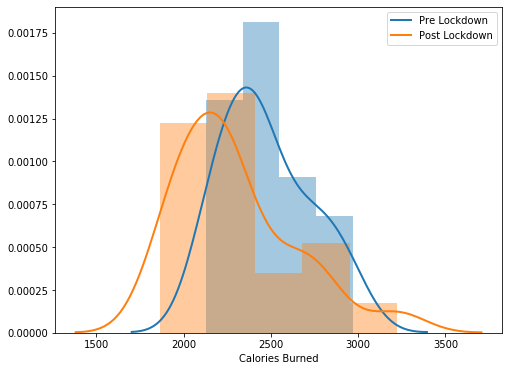

PreLockdown
2475.0 259.84431236158827
PostLockdown
2290.0714285714284 328.9108771071049


In [569]:
metric = 'Calories Burned'
f, ax = plt.subplots(figsize=(8,6))
bins = 21
percentile_bins = np.linspace(0,100,bins)
pre_bins = np.percentile(df_exercise_preLockdown[metric], percentile_bins)

post_bins = np.percentile(df_exercise_postLockdown[metric], percentile_bins)
sns.distplot(pre_bins,kde_kws={ "lw": 2, "label": "Pre Lockdown"},axlabel=metric)
sns.distplot(post_bins,kde_kws={ "lw": 2, "label": "Post Lockdown"})

plt.show()

print("PreLockdown")
print(df_exercise_preLockdown[metric].mean(),df_exercise_preLockdown[metric].std())
print("PostLockdown")
print(df_exercise_postLockdown[metric].mean(),df_exercise_postLockdown[metric].std())

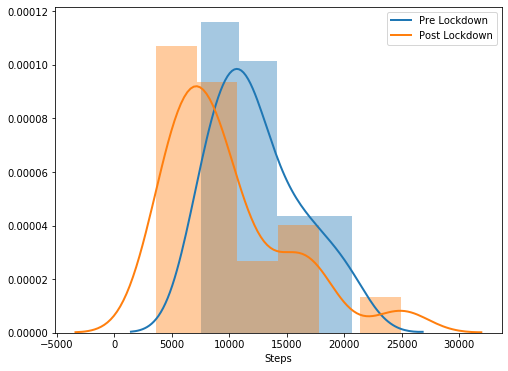

PreLockdown
12463.3125 3993.4418691775145
PostLockdown
9702.642857142857 5101.300046460819


In [570]:
metric = 'Steps'
f, ax = plt.subplots(figsize=(8,6))
bins = 21
percentile_bins = np.linspace(0,100,bins)
pre_bins = np.percentile(df_exercise_preLockdown[metric], percentile_bins)

post_bins = np.percentile(df_exercise_postLockdown[metric], percentile_bins)
sns.distplot(pre_bins,kde_kws={ "lw": 2, "label": "Pre Lockdown"},axlabel=metric)
sns.distplot(post_bins,kde_kws={ "lw": 2, "label": "Post Lockdown"})

plt.show()

print("PreLockdown")
print(df_exercise_preLockdown[metric].mean(),df_exercise_preLockdown[metric].std())
print("PostLockdown")
print(df_exercise_postLockdown[metric].mean(),df_exercise_postLockdown[metric].std())

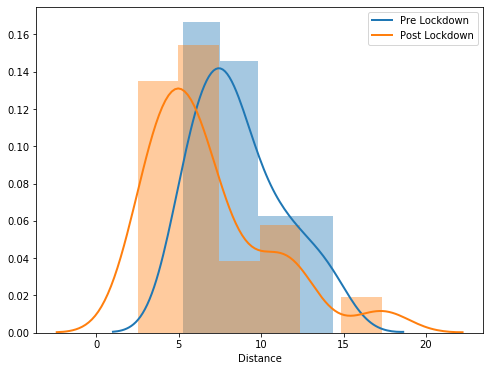

PreLockdown
8.682500000000001 2.776262475583556
PostLockdown
6.743571428571428 3.5487454374601426


In [571]:
metric = 'Distance'
f, ax = plt.subplots(figsize=(8,6))
bins = 21
percentile_bins = np.linspace(0,100,bins)
pre_bins = np.percentile(df_exercise_preLockdown[metric], percentile_bins)

post_bins = np.percentile(df_exercise_postLockdown[metric], percentile_bins)
sns.distplot(pre_bins,kde_kws={ "lw": 2, "label": "Pre Lockdown"},axlabel=metric)
sns.distplot(post_bins,kde_kws={ "lw": 2, "label": "Post Lockdown"})

plt.show()

print("PreLockdown")
print(df_exercise_preLockdown[metric].mean(),df_exercise_preLockdown[metric].std())
print("PostLockdown")
print(df_exercise_postLockdown[metric].mean(),df_exercise_postLockdown[metric].std())

In [572]:
df_exercise_preLockdown[['Calories Burned','Steps','Distance']].corr()

,Calories Burned,Steps,Distance
Calories Burned,1.000000,0.994898,0.995085
Steps,0.994898,1.000000,0.999851
Distance,0.995085,0.999851,1.000000


In [573]:
df_exercise_postLockdown[['Calories Burned','Steps','Distance']].corr()

,Calories Burned,Steps,Distance
Calories Burned,1.000000,0.991998,0.992385
Steps,0.991998,1.000000,0.999959
Distance,0.992385,0.999959,1.000000


In [574]:
def to_proper_format(value):
    if(type(value)!= np.ndarray):
        hours = int(value/60)
        minutes = math.ceil(value % 60)
        if hours == 0:
            return ["{} minutes".format(minutes)]
        return ["{} hours {} minutes".format(hours,minutes)]
    else:
        for v in value:
            if(len(value) == 1):
                return to_proper_format(v)
            else:
                return to_proper_format(v) + to_proper_format(value[1:])

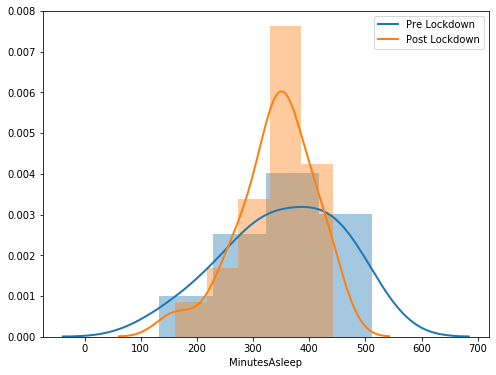

PreLockdown
353.1904761904762 103.00515474849743
PostLockdown
339.3529411764706 70.16849468998764
PreLockdown
['5 hours 54 minutes'] ['1 hours 44 minutes']
PostLockdown
['5 hours 40 minutes'] ['1 hours 11 minutes']


In [575]:
metric = 'MinutesAsleep'
f, ax = plt.subplots(figsize=(8,6))
bins = 21
percentile_bins = np.linspace(0,100,bins)
pre_bins = np.percentile(df_sleep_preLockdown[metric], percentile_bins)

post_bins = np.percentile(df_sleep_postLockdown[metric], percentile_bins)
sns.distplot(pre_bins,kde_kws={ "lw": 2, "label": "Pre Lockdown"},axlabel=metric)
sns.distplot(post_bins,kde_kws={ "lw": 2, "label": "Post Lockdown"})

plt.show()

print("PreLockdown")
print(df_sleep_preLockdown[metric].mean(),df_sleep_preLockdown[metric].std())
print("PostLockdown")
print(df_sleep_postLockdown[metric].mean(),df_sleep_postLockdown[metric].std())


print("PreLockdown")
print(to_proper_format(df_sleep_preLockdown[metric].mean()),to_proper_format(df_sleep_preLockdown[metric].std()))
print("PostLockdown")
print(to_proper_format(df_sleep_postLockdown[metric].mean()),to_proper_format(df_sleep_postLockdown[metric].std()))

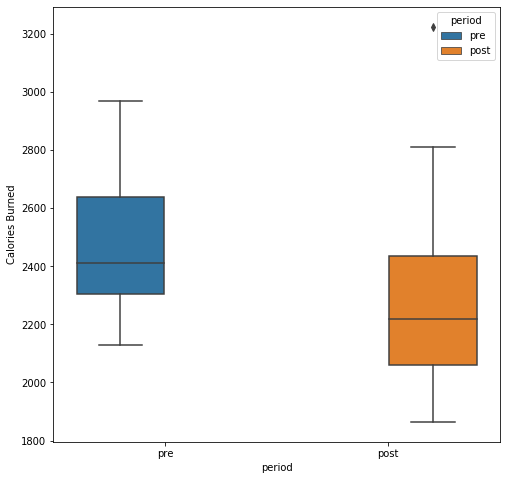

In [576]:
metric = 'Calories Burned'
f, ax = plt.subplots(figsize=(8,8))
bins = 21
percentile_bins = np.linspace(0,100,bins)
pre_bins = np.percentile(df_exercise_preLockdown[metric], percentile_bins)

post_bins = np.percentile(df_exercise_postLockdown[metric], percentile_bins)

period = ['pre'] * len(pre_bins)   + ['post'] * len(post_bins) 

mdict = {'period':period,metric:list(pre_bins) + list(post_bins) }

df_combine = pd.DataFrame(mdict)

sns.boxplot(x='period', y=metric, hue='period', data=df_combine)

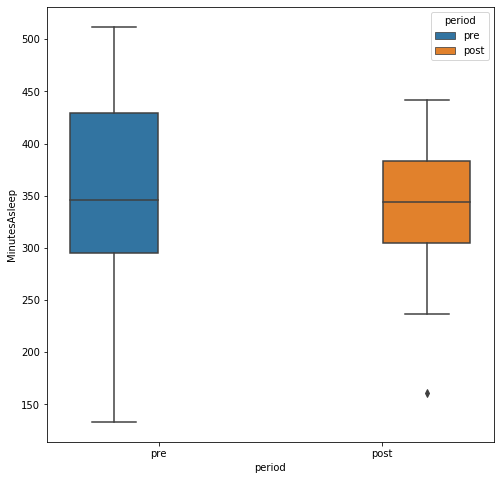

In [577]:
metric = 'MinutesAsleep'
f, ax = plt.subplots(figsize=(8,8))
bins = 21
percentile_bins = np.linspace(0,100,bins)
pre_bins = np.percentile(df_sleep_preLockdown[metric], percentile_bins)

post_bins = np.percentile(df_sleep_postLockdown[metric], percentile_bins)

period = ['pre'] * len(pre_bins)   + ['post'] * len(post_bins) 

mdict = {'period':period,metric:list(pre_bins) + list(post_bins) }

df_combine = pd.DataFrame(mdict)

sns.boxplot(x='period', y=metric, hue='period', data=df_combine)

In [578]:
df_combine = pd.concat([df_exercise_preLockdown,df_exercise_postLockdown])
df_combine.head()

,Date,Calories Burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,Day
43,2020-02-13,2755,16459,11.44,0,740,305,46,46,740,Thursday
44,2020-02-14,2896,19163,13.43,0,495,342,70,21,495,Friday
47,2020-02-17,2229,9037,6.29,0,780,197,30,25,780,Monday
48,2020-02-18,2437,11677,8.24,0,759,295,16,14,759,Tuesday
49,2020-02-19,2330,9962,6.92,0,1133,281,16,10,1133,Wednesday


In [579]:
df_combine.columns

Index(['Date', 'Calories Burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'Day'],
      dtype='object')

In [580]:
cols = ['Date','Calories Burned','Minutes Sedentary','Minutes Lightly Active','Minutes Fairly Active','Minutes Very Active']

In [581]:
df_exer = df_combine[cols]
df_exer.columns = ['Date','CaloriesBurned','MinutesSedentary',
                                   'MinutesLightlyActive','MinutesFairlyActive','MinutesVeryActive']

In [582]:
df_exer.head()

,Date,CaloriesBurned,MinutesSedentary,MinutesLightlyActive,MinutesFairlyActive,MinutesVeryActive
43,2020-02-13,2755,740,305,46,46
44,2020-02-14,2896,495,342,70,21
47,2020-02-17,2229,780,197,30,25
48,2020-02-18,2437,759,295,16,14
49,2020-02-19,2330,1133,281,16,10


In [583]:
df_sleep = pd.concat([df_sleep_postLockdown,df_sleep_preLockdown])